# Coursera Capstone Project: Segmenting and Clustering Neighborhoods in Toronto
### Applied Data Science Capstone by IBM/Coursera <a name="toc"></a>
### Author: Kapil Kumar Nagwanshi 


## Table of contents 
* [Introduction: Business Problem](#introduction)
* [Objective](#objective)
* [Data](#data)
* [Background](#background)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## Introduction: Business Problem <a name="introduction"></a>
The battel of neighborhood is an important data science project targeting the clusters of similar types to provide a user to exploit this as a tool for an ample number of business choices. This project is based on the application of different data science techniques learned in the entire course. [Top](#toc)

## Objective <a name="objective"></a>
With the given set of objectives, the battle of neighborhoods has been implemented for exploration of data using Segmenting and Clustering techniques applied to the neighborhoods in Toronto.  The objective of Applied Data Science Capstone is given as follows:
1.	To learn about clustering and k-means clustering in particular.
2.	To showcase this project in the form the public repository using GitHub platform.
3.	To learn how to use the Foursquare API and clustering to segment and cluster the neighborhoods in New York City.
4.	To learn how to use the Beautifulsoup Python package to scrape websites and parse HTML code.
5.	To apply the skills acquired so far in this course to segment and cluster neighborhoods in the city of Toronto. 

Aiming to achieve above objectives the data has been collected from Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M . For this purpose knowledge of Python, Data Science, Visualization, Machine Learning Algorithms, Segmentation, HTML parsing, Repository site github, and Foursquare is required. How do I utilized the complete program to build the “The Battle of Neighborhoods” project have been shown in background section. [Top](#toc) 


## Data <a name="data"></a>

Based on the problem statement:
* Following data sources will be needed to extract/generate the required information:, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Geocoder**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of Toronto center will be obtained using **Geocoder** of well known Toronto location 
    - The data frame will consist of three columns: __PostalCode, Borough, and Neighborhood__
    - Needs to process only those cells that have an assigned Borough. Ignore cells with a Borough that is Not assigned.
    - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, one can see that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the Borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
- Needs to clean the data using aprropriate methodhs. [Top](#toc) 

## Background <a name="background"></a>
The battel of neighborhood was started from day one of the IBM Data Science Professional Certificate course designed uniquely to become data scientist (Santarcangelo, Ahuja, et al. 2018) . The introduction of each of the faculty members involved into delivering this course have been given in the cited web source as shown in the reference section of this report.  Following set of courses described how it has been utilized to develop the Capstone Project. 

1. The course started with learning “What is data Science”, which was taught by Alex Aklson and Polong Lin. This module motivated us to lead towards the path of data science (Aklson and Lin, What is Data Science 2018). This module gives the insight about the statistics involved in the field of data science, the demand for data scientists, and some of the qualities of excelling data scientists. According to this course module data science is considered the sexiest job in the 21st century. The term "cloud" was explained by the scientists. Different tools, algorithms, and technologies they use on a daily basis were elaborated and also motivated by the data science professionals as they give advice to anyone who is passionate about data science. 

2. Open Source tools such as Jupyter Notebook, Apache Zeppelin Notebooks, and IBM Data Science Experience and Cognitive Class Labs (IBM Watson) for Data Science were discussed by Polong Lin (Lin 2018). The entire lab practice sessions for all other courses were completed using IBM Watson. 

3. The course Data Science Methodology presented by Alex and Lin, explained the characteristics of the modeling process, the Modeling and the Model Evaluation stages pertaining to any data science problem. This module helped us to understand data, ways in which data is prepared, the purpose of data modeling, means to evaluate a model and ways in which a model is evaluated, means to prepare or clean data and finally to complete the Data Understanding and the Data Preparation stages pertaining to any data science problem (Aklson and Lin, Data Science Methodology 2018).

4. The course Python for Data Science and AI started practical journey, which was delivered by Joseph Santarcangelo. This module covered Python Basics, first program, Types, Expressions and Variables, String Operations, Python Data Structures such as Lists and Tuples, Sets, Dictionaries.  Programming Fundamentals such as Conditions and Branching, Loops, Functions, and Objects and Classes were discussed.  This course also covered Reading files with open, writing files with open, loading data with Pandas, working with and Saving data with Pandas and Numpy (Santarcangelo, Python for data science 2018). 

5. The Databases and SQL for Data Science course taught by Rav Ahuja, helped us to understand SQL and Relational Databases, to write basic SQL statements, Practice basic SQL statements hands-on on a live database, and to create a database instance on the IBM Watson Cloud (Ahuja 2018). 

6. The course Data Analysis with Python taught by Joseph Santarcangelo, covered data analysis from scratch. This is the biggest and very important course in this program. The PGA also found helpful to develop our concept of Data Analytics with Python (Santarcangelo, Data Analysis with Python 2018). 

7. Data Visualization with Python is the 7th course in this series. Alex Aklson taught in this course about reading csv files into a pandas dataframe and process and manipulate the data in the dataframe followed by data visualization and some of the best practices to keep in mind when creating plots and visuals. He has also explained different kinds of plots using Matplotlib (Aklson, Introduction to Data Visualization Tools 2018).

8. Machine Learning with Python is the final derivable of this certification course. The course has taught by Saeed Aghabozorgi. He has demonstrated the Python libraries for Machine Learning. The course covered Supervised vs. Unsupervised algorithms with examples. Simple and Multiple Regression, Linear and Non-Linear Regression have been on a dataset for estimation. Different Classification methods and its application have been shown in various datasets to solve real world problems. Recommender systems have been discussed, in this connection, we will get introduced with main idea behind recommendation engines, then two main types of recommendation engines, namely, content-based and collaborative filtering (Aghabozorgi 2018).

9. The github repository is a way to showcase our implemented ideas in front of the world. Github has been setup using steps given in a blog post entitled “How to Properly Setup Your Github Repository — Windows Version” by our faculty Alex Aklson (Aklson 2019). 

All the above topics have been utilized to find the solution of problem effectively. 


### Import initialization libraries

In [1]:
#import necessary libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # Library for web scraping
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv
print('Library import done...')

Library import done...


### Neighborhood Candidates
Let's first find the latitude & longitude of Berlin city center, using specific, well known address and Google Maps geocoding API.Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown in assignment.

#### This part shows raw data frame obtained from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M withput cleaning
__To create the dataframe: Remember__

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making. 
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [2]:
#BeautifulSoup instances
res_site = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res_site.content,'lxml')
table = soup.find_all('table')[0] 
#toronto_data = pd.read_html(str(table))[0]
##########################################
table_rows = table.tbody.find_all("tr")

res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    
# Only process the cells that have an assigned borough. 
#Ignore cells with a borough that is Not assigned.
# If a cell has a borough but a "Not assigned" neighborhood, 
#then the neighborhood will be the same as the borough.
    if row != [] and row[1] != "Not assigned":
        if "Not assigned" in row[2]: 
            row[2] = row[1]
        res.append(row)

# Dataframe with 3 columns
df_toronto = pd.DataFrame(res, columns = ["PostalCode", "Borough", "Neighborhood"])
df_toronto.head()

PostalCode           Borough        Neighborhood
0        M3A        North York         Parkwoods\n
1        M4A        North York  Victoria Village\n
2        M5A  Downtown Toronto      Harbourfront\n
3        M6A        North York  Lawrence Heights\n
4        M6A        North York    Lawrence Manor\n

In [3]:
# Remove '\n' from Neighborhood
df_toronto["Neighborhood"] = df_toronto["Neighborhood"].str.replace("\n","")
df_toronto.info

<bound method DataFrame.info of     PostalCode           Borough              Neighborhood
0          M3A        North York                 Parkwoods
1          M4A        North York          Victoria Village
2          M5A  Downtown Toronto              Harbourfront
3          M6A        North York          Lawrence Heights
4          M6A        North York            Lawrence Manor
..         ...               ...                       ...
205        M8Z         Etobicoke  Kingsway Park South West
206        M8Z         Etobicoke                 Mimico NW
207        M8Z         Etobicoke        The Queensway West
208        M8Z         Etobicoke     Royal York South West
209        M8Z         Etobicoke            South of Bloor

[210 rows x 3 columns]>

#### This part shows cleaned obtained dataframe with grouping of same postal codes

In [4]:
df_toronto = df_toronto.groupby(["PostalCode", "Borough"])\
["Neighborhood"].apply(", ".join).reset_index()
df_toronto.head() 

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Rouge, Malvern
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

### Let us see the description of df_toronto

In [5]:
df_toronto.info

<bound method DataFrame.info of     PostalCode      Borough                                       Neighborhood
0          M1B  Scarborough                                     Rouge, Malvern
1          M1C  Scarborough             Highland Creek, Rouge Hill, Port Union
2          M1E  Scarborough                  Guildwood, Morningside, West Hill
3          M1G  Scarborough                                             Woburn
4          M1H  Scarborough                                          Cedarbrae
..         ...          ...                                                ...
98         M9N         York                                             Weston
99         M9P    Etobicoke                                          Westmount
100        M9R    Etobicoke  Kingsview Village, Martin Grove Gardens, Richv...
101        M9V    Etobicoke  Albion Gardens, Beaumond Heights, Humbergate, ...
102        M9W    Etobicoke                                          Northwest

[103 rows x 3 colum

In [6]:
df_toronto.describe()

PostalCode     Borough      Neighborhood
count         103         103               103
unique        103          10               103
top           M1T  North York  Islington Avenue
freq            1          24                 1

In [7]:
df_toronto.shape

(103, 3)

In [8]:
df_toronto.head(15) # Top 15 rows

PostalCode      Borough                                       Neighborhood
0         M1B  Scarborough                                     Rouge, Malvern
1         M1C  Scarborough             Highland Creek, Rouge Hill, Port Union
2         M1E  Scarborough                  Guildwood, Morningside, West Hill
3         M1G  Scarborough                                             Woburn
4         M1H  Scarborough                                          Cedarbrae
5         M1J  Scarborough                                Scarborough Village
6         M1K  Scarborough        East Birchmount Park, Ionview, Kennedy Park
7         M1L  Scarborough                    Clairlea, Golden Mile, Oakridge
8         M1M  Scarborough    Cliffcrest, Cliffside, Scarborough Village West
9         M1N  Scarborough                        Birch Cliff, Cliffside West
10        M1P  Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...
11        M1R  Scarborough                                  Maryvale, Wexford
12        M1S  Scarborough                                          Agincourt
13        M1T  Scarborough            Clarks Corners, Sullivan, Tam O'Shanter
14        M1V  Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...

### Word Cloud Diagram for Postal Code, Borough, and Neighborhood

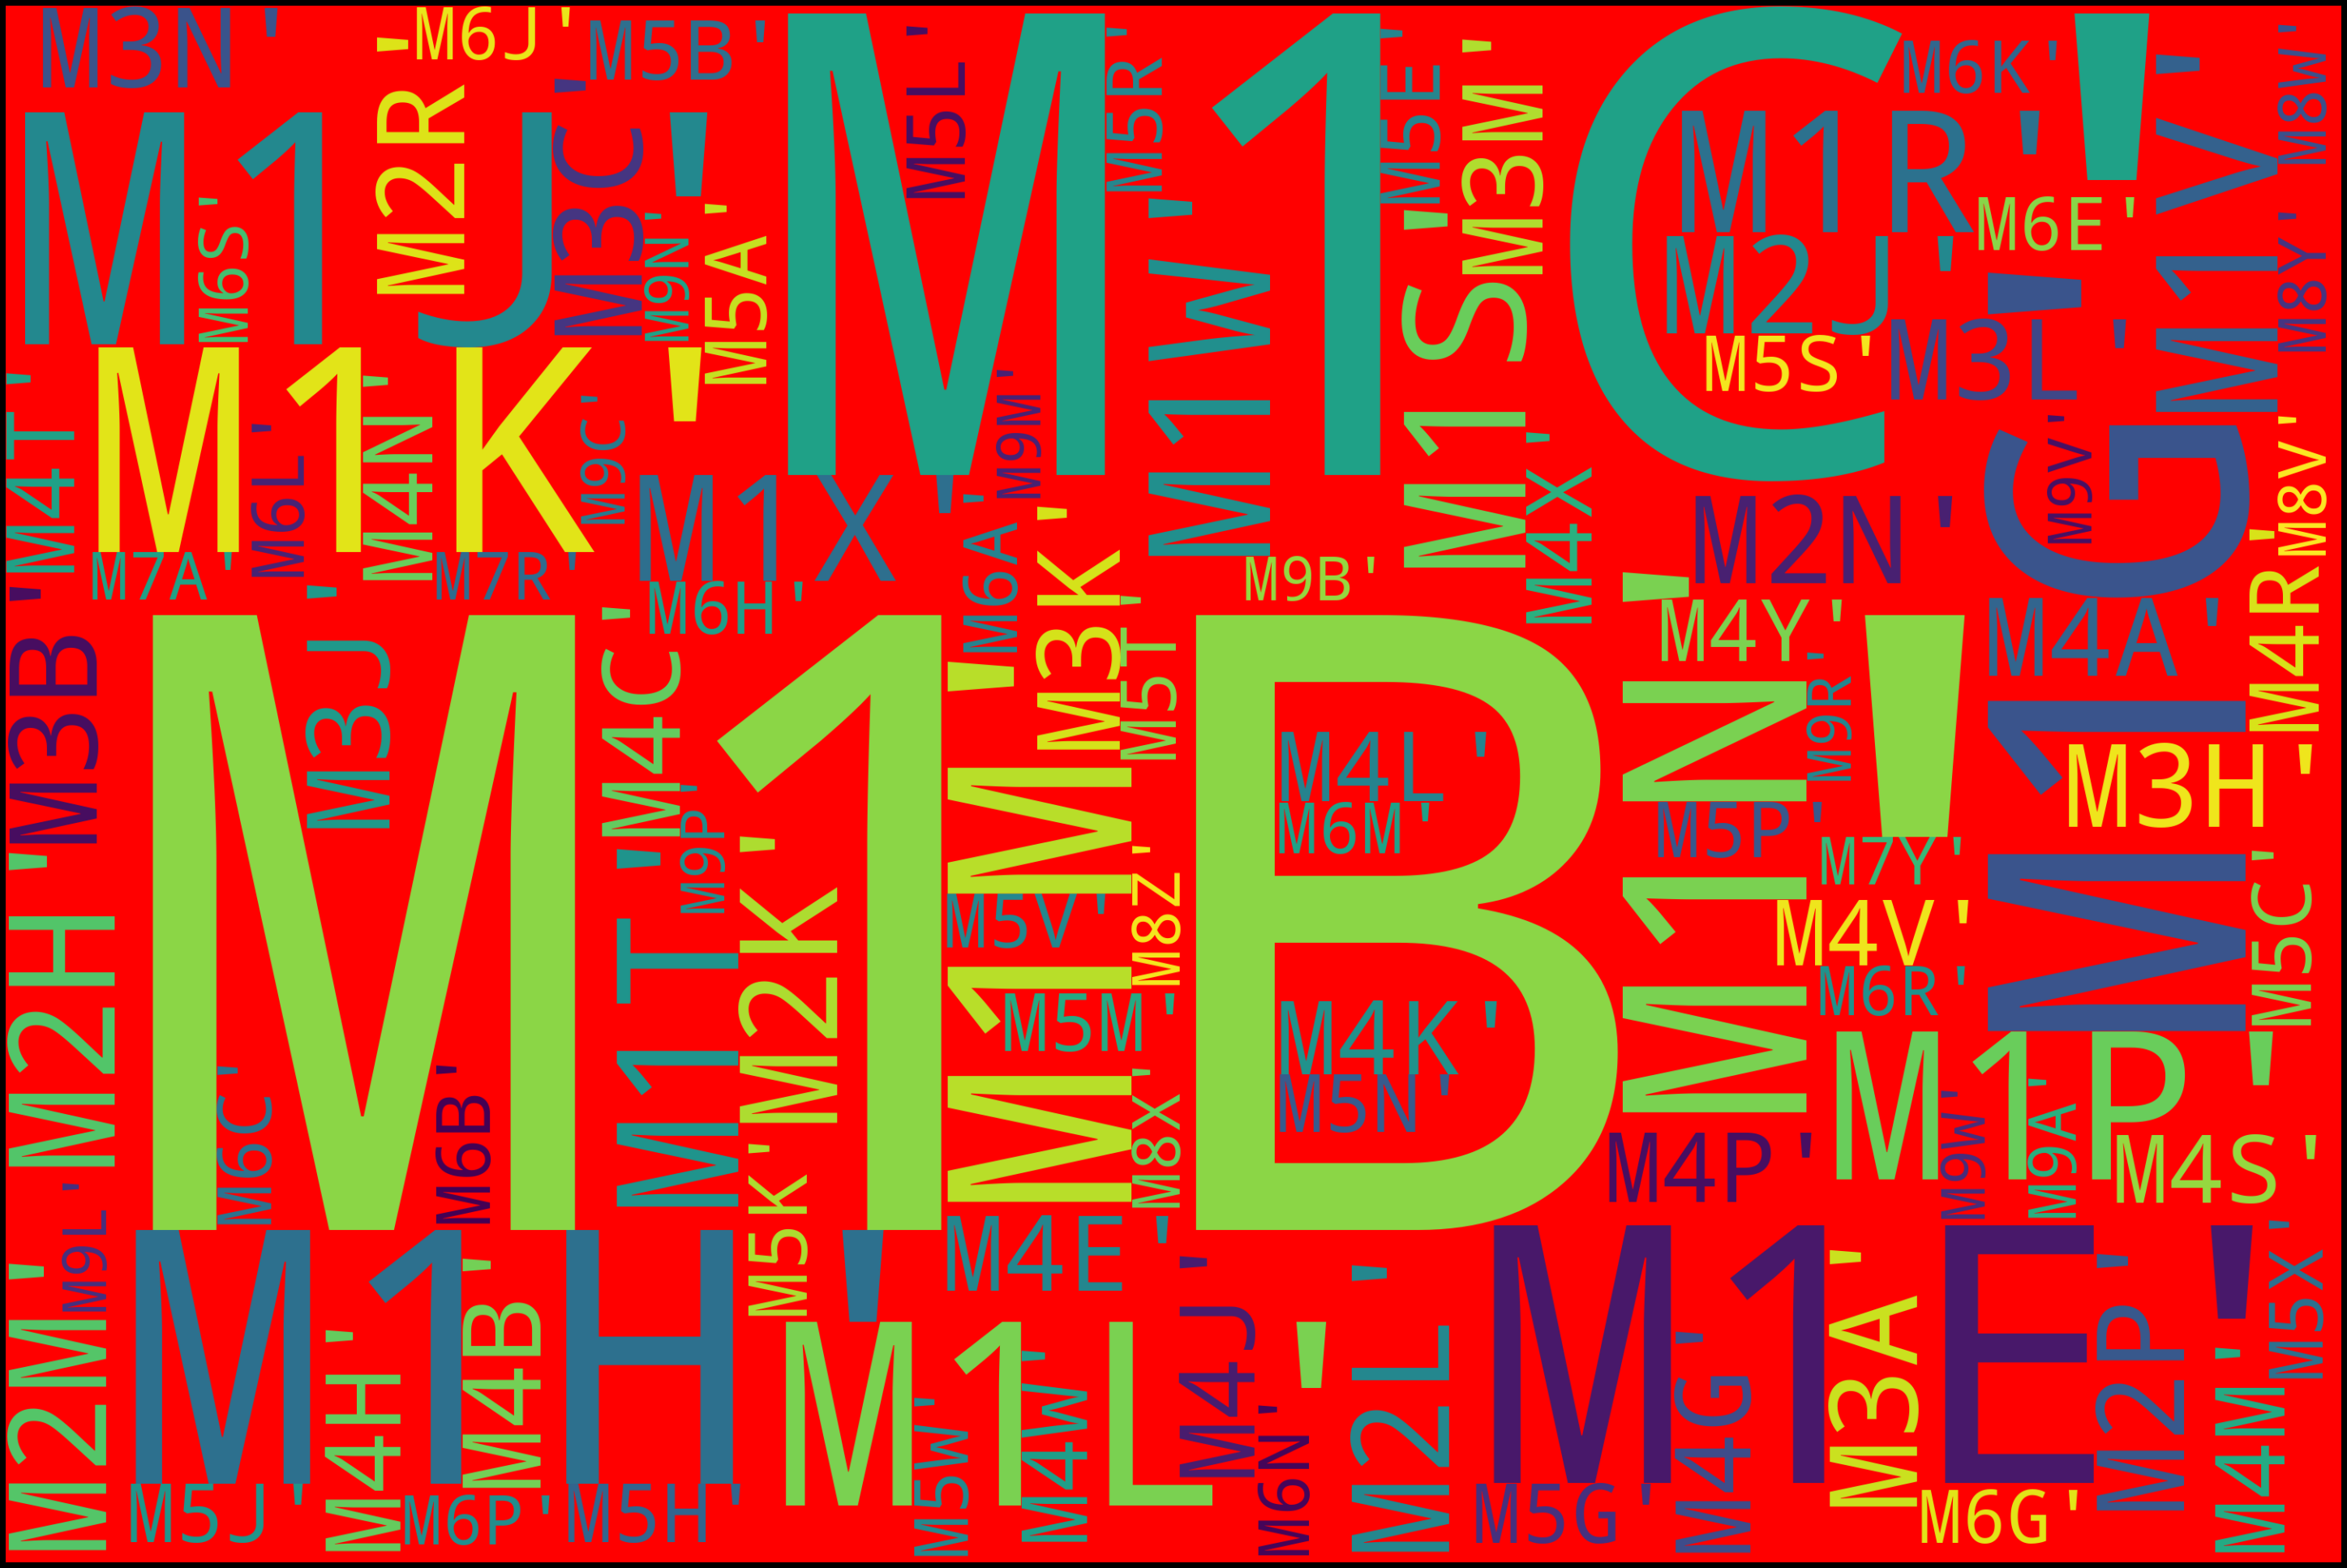

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_toronto.PostalCode.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'red',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

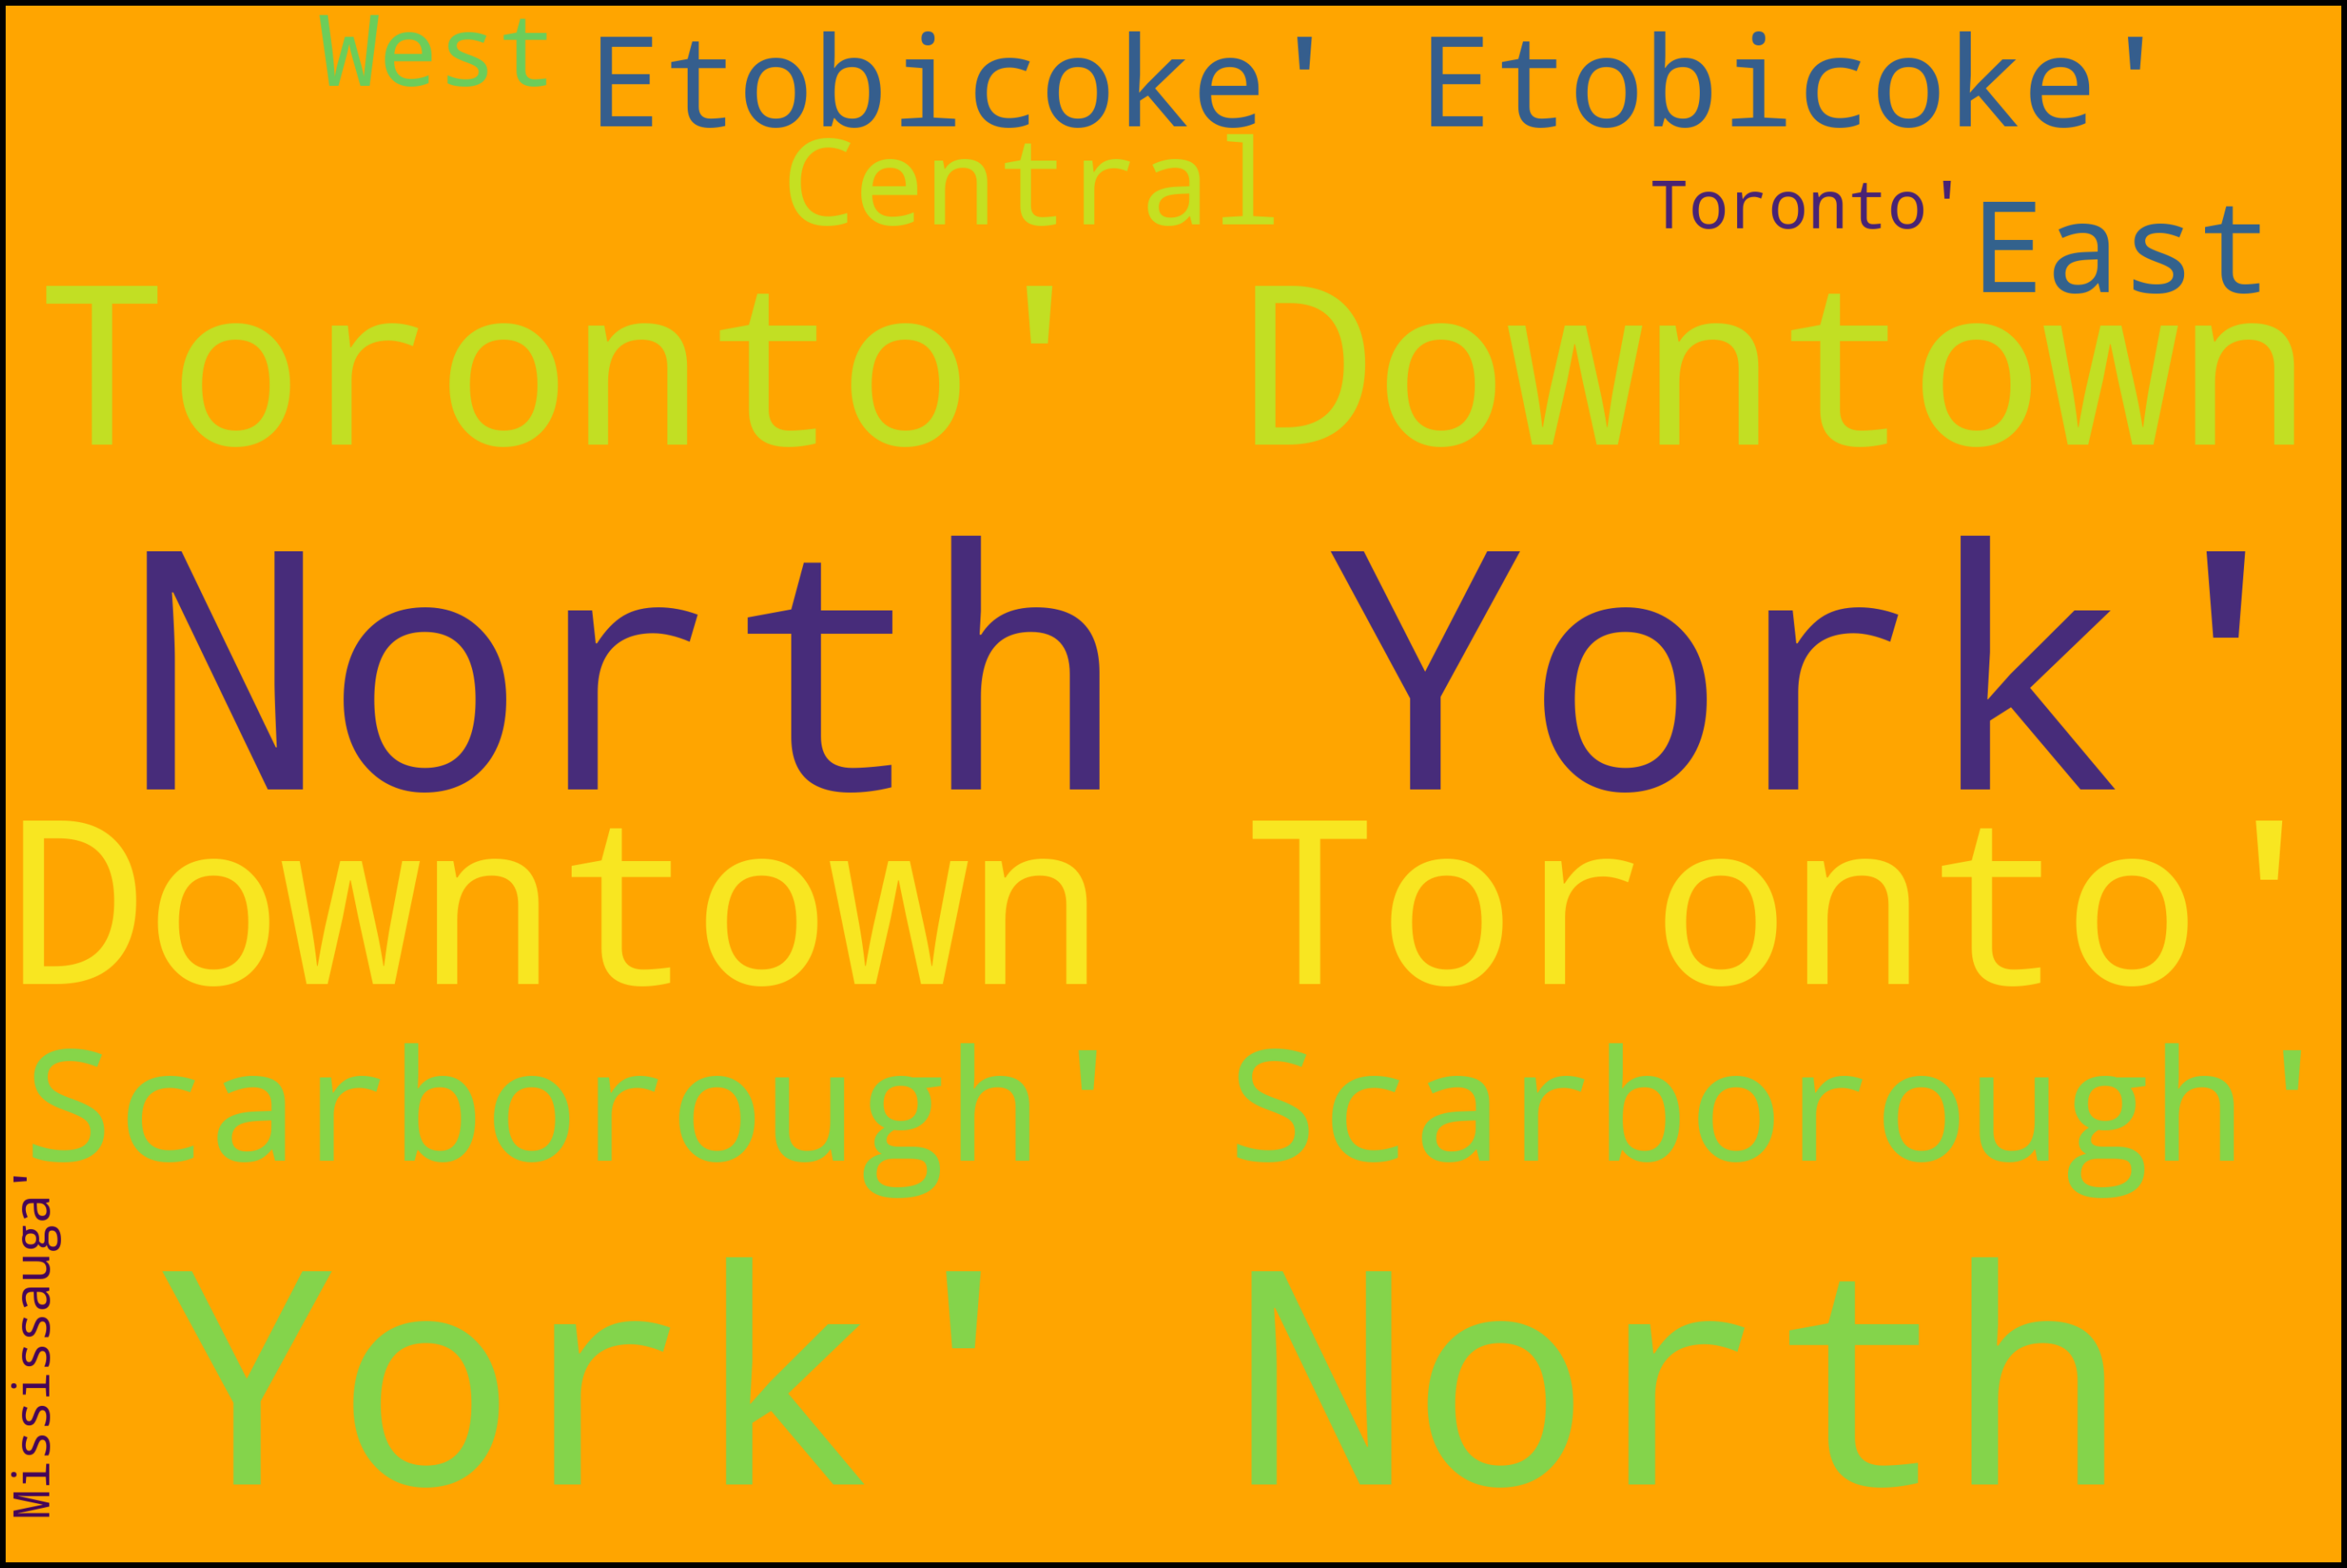

In [10]:
# Word Cloud Diagram for Borough
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_toronto.Borough.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'orange',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

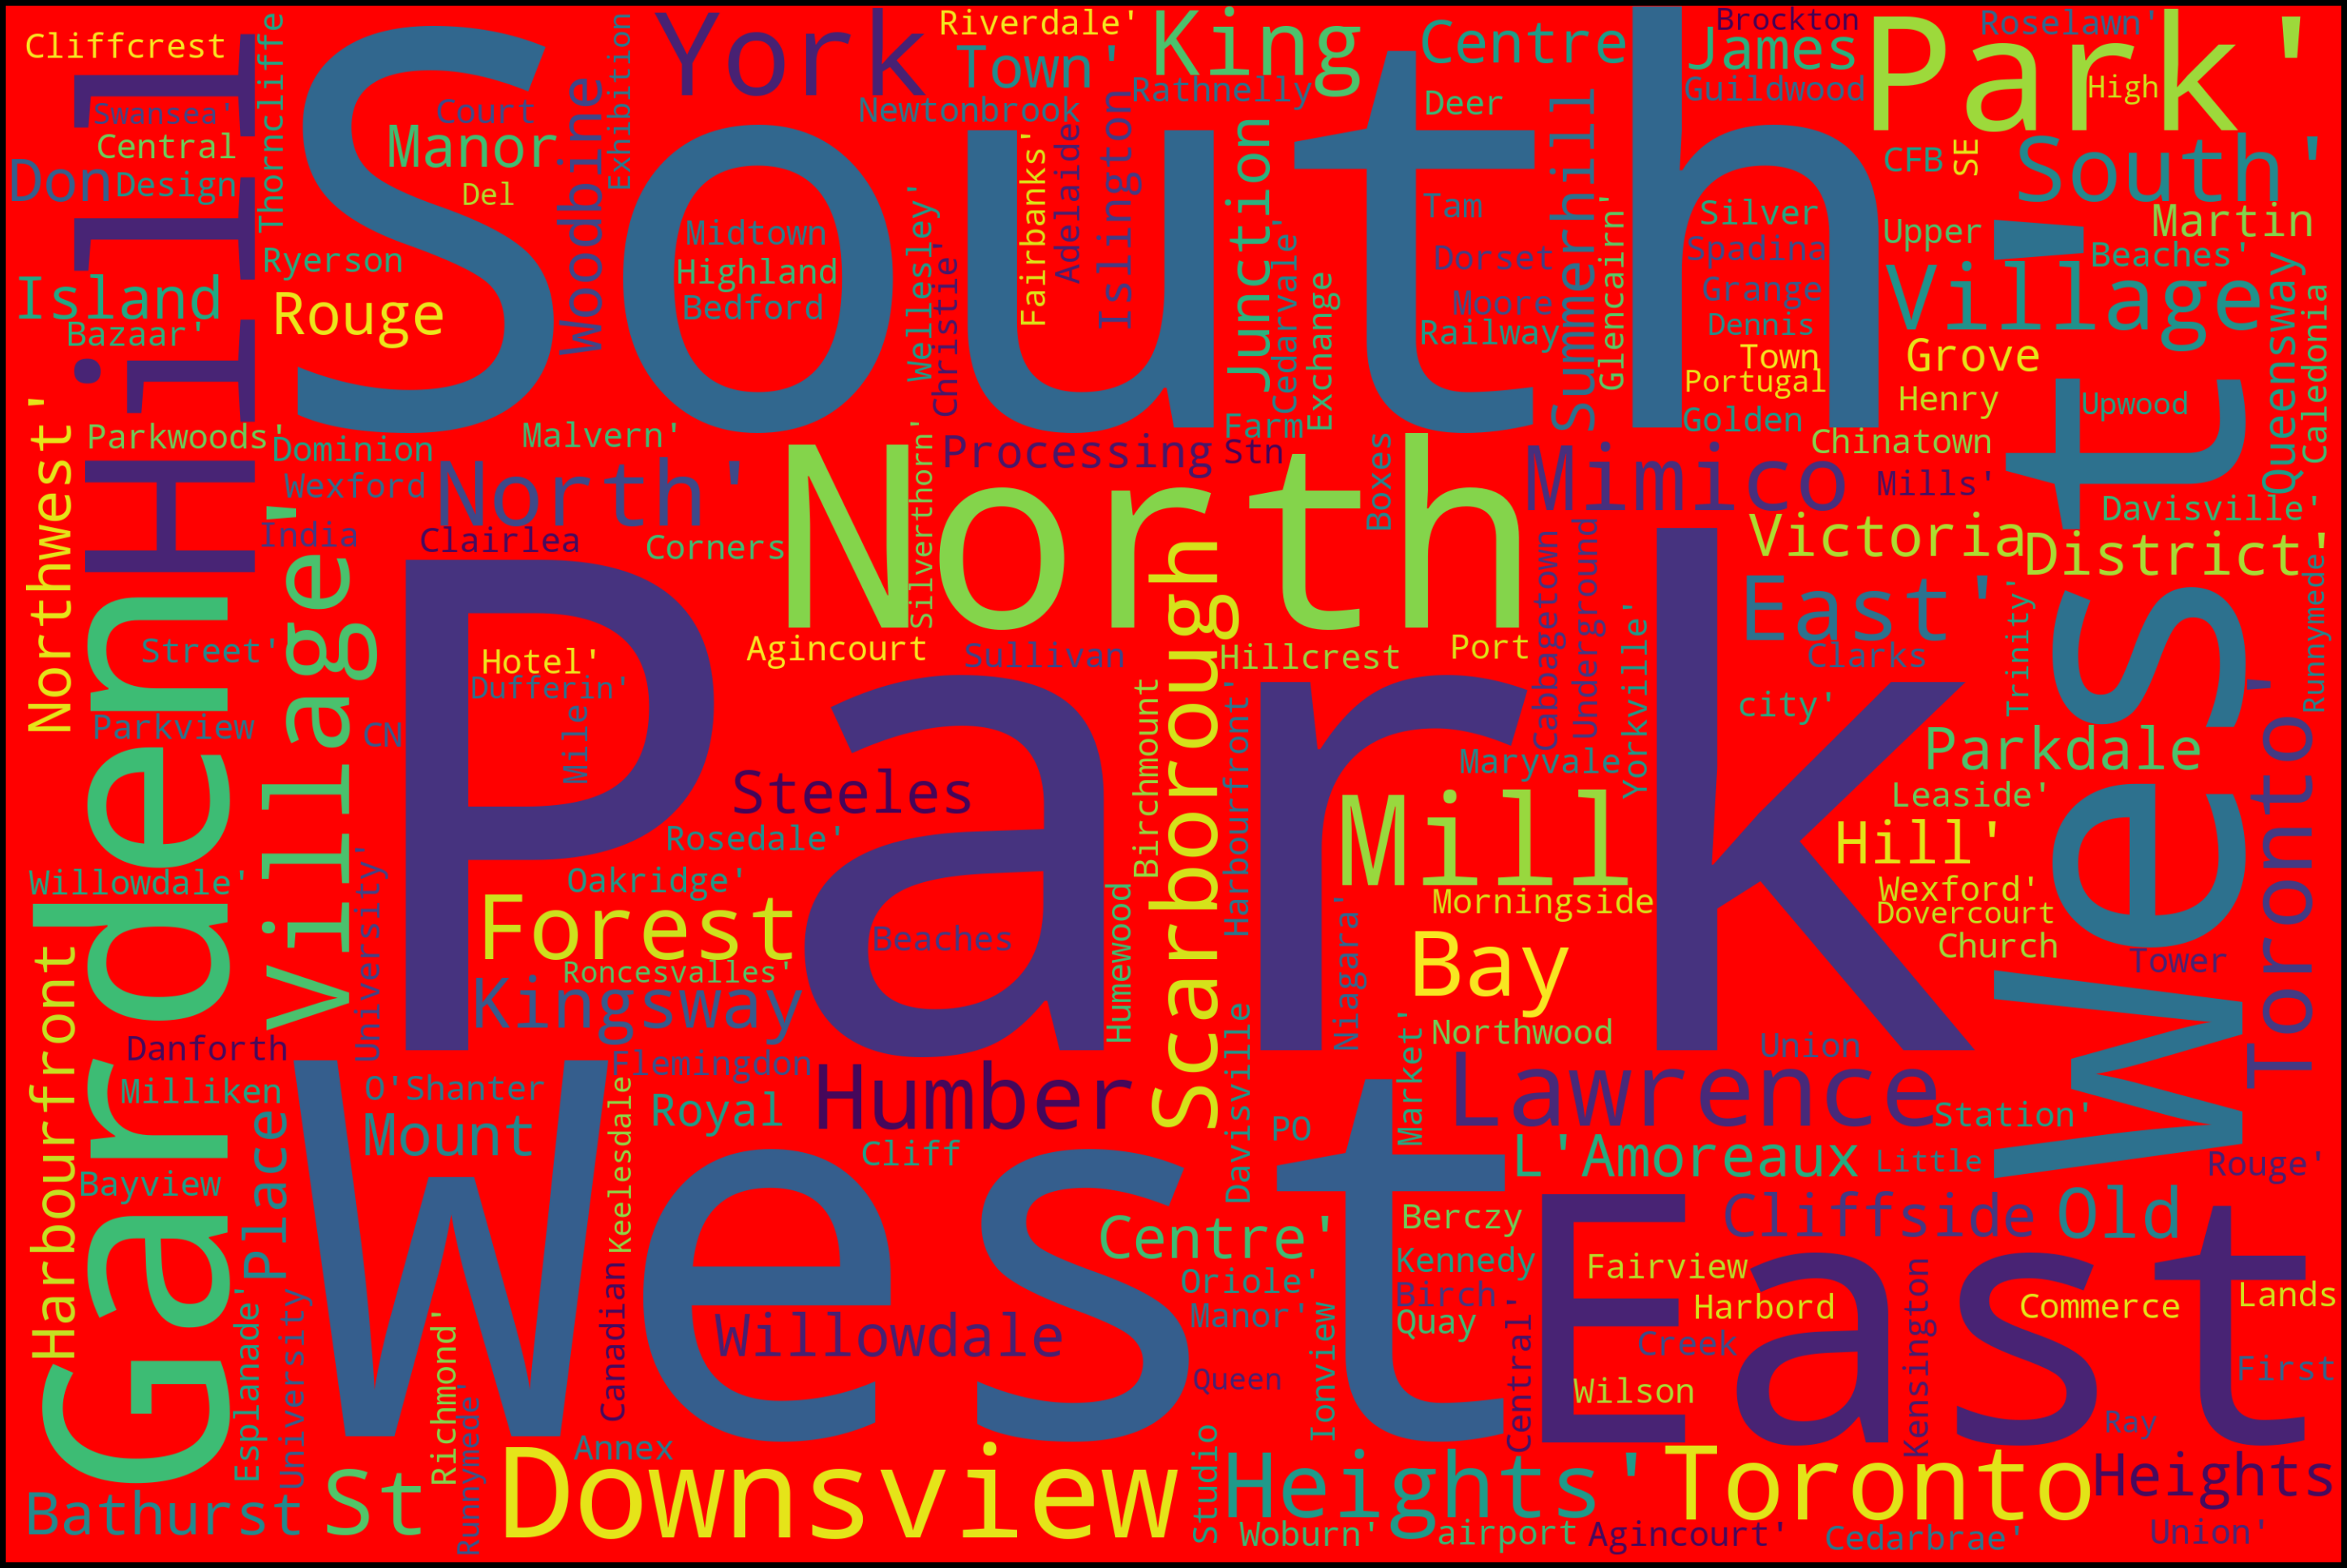

In [11]:
# Word Cloud Diagram for Neighborhood
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_toronto.Neighborhood.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'red',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Geopy Package for location access
The dataframe of the postal code of each neighborhood along with the borough name and neighborhood name have been created, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html. The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. 

In [12]:
import geopy
from  geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='X@yy.com') # Important line
geopy.geocoders.options.default_user_agent = "X@yy.com" # Important line
geolocator = Nominatim()

In [13]:
city ="Toronto"
country ="Canada"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 43.653963 
longtitude is:- -79.387207


In [14]:
location = geolocator.geocode("Toronto, North York, Parkwoods")
print(location.address)
print('')
print((location.latitude, location.longitude))
print('')
print(location.raw)

Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada

(43.7587999, -79.3201966)

{'place_id': 124974741, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406961, 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'], 'lat': '43.7587999', 'lon': '-79.3201966', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}


### Get the latitude and the longitude coordinates of each neighborhood obtained 

In [15]:
import geopy
from  geopy.geocoders import Nominatim
import pandas as pd
locator = Nominatim(user_agent="KapilsGeocoder")
location = locator.geocode("Toronto, Canada")
from geopy.extra.rate_limiter import RateLimiter
# PostalCode  Borough  Neighborhood
df_temp=df_toronto.copy()
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_temp['Address'] = df_temp['PostalCode'].astype(str) + ',' + ' Toronto'   
df_temp['Location'] = df_temp['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_temp['Point'] = df_temp['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
# df_temp[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_temp['Point'].tolist(), index=df_temp.index)
df_temp # get the Get the latitude and the longitude coordinates of each neighborhood obtained

PostalCode      Borough  \
0          M1B  Scarborough   
1          M1C  Scarborough   
2          M1E  Scarborough   
3          M1G  Scarborough   
4          M1H  Scarborough   
..         ...          ...   
98         M9N         York   
99         M9P    Etobicoke   
100        M9R    Etobicoke   
101        M9V    Etobicoke   
102        M9W    Etobicoke   

                                          Neighborhood       Address  \
0                                       Rouge, Malvern  M1B, Toronto   
1               Highland Creek, Rouge Hill, Port Union  M1C, Toronto   
2                    Guildwood, Morningside, West Hill  M1E, Toronto   
3                                               Woburn  M1G, Toronto   
4                                            Cedarbrae  M1H, Toronto   
..                                                 ...           ...   
98                                              Weston  M9N, Toronto   
99                                           Westmount  M9P, Toronto   
100  Kingsview Village, Martin Grove Gardens, Richv...  M9R, Toronto   
101  Albion Gardens, Beaumond Heights, Humbergate, ...  M9V, Toronto   
102                                          Northwest  M9W, Toronto   

                                              Location  \
0    (Toronto, Punta Gorda, Montevideo, 11403, Urug...   
1    (Toronto, Punta Gorda, Montevideo, 11403, Urug...   
2                                                 None   
3    (Scarborough—Guildwood, Scarborough, Toronto, ...   
4                                                 None   
..                                                 ...   
98                                                None   
99                                                None   
100  (Etobicoke Centre, Etobicoke, Toronto, Golden ...   
101                                               None   
102                                               None   

                                            Point  
0                 (-34.8899421, -56.0790982, 0.0)  
1                 (-34.8899421, -56.0790982, 0.0)  
2                                            None  
3    (43.76571676956549, -79.22189842824983, 0.0)  
4                                            None  
..                                            ...  
98                                           None  
99                                           None  
100  (43.69516618990701, -79.55088985426742, 0.0)  
101                                          None  
102                                          None  

[103 rows x 6 columns]

In [16]:
df_tempgb= df_temp.groupby('Point').apply(lambda x: x) 
df_tempgb.describe()

TypeError: unhashable type: 'Location'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Location'


PostalCode     Borough  \
count          26          26   
unique         26           7   
top           M1C  North York   
freq            1           7   

                                             Neighborhood       Address  \
count                                                  26            26   
unique                                                 26            26   
top     Bloordale Gardens, Eringate, Markland Wood, Ol...  M7A, Toronto   
freq                                                    1             1   

                                                 Location  \
count                                                  26   
unique                                                 15   
top     (Toronto, Golden Horseshoe, Ontario, Canada, (...   
freq                                                   10   

                                        Point  
count                                      26  
unique                                     14  
top     (43.7170226, -79.41978303501344, 0.0)  
freq                                       10

In [17]:
df_tempgb.isnull().sum(axis = 0)

PostalCode      77
Borough         77
Neighborhood    77
Address         77
Location        77
Point           77
dtype: int64

#### From the above simple solution, we are only able to get location info for 26 neighborhood and 77 locations yield a NaN using ```geopy.geocoders ``` package. We use the CSV file named Geospatial_Coordinates.csv obtained from Canada Government Website.

In [18]:
df_geo_coor = pd.read_csv("./Geospatial_Coordinates.csv")
df_geo_coor.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [19]:
df_toronto.head() 
# df_toronto dataframe played through geocoder 
# beacause of call limits it won't work for all see 'none' in point columns 

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Rouge, Malvern
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

__Now We need to couple 2 dataframes "df_toronto" and "df_geo_coor" into one dataframe.__

In [20]:
df_toronto2 = pd.merge(df_toronto, df_geo_coor, how='left', left_on = 'PostalCode', right_on = 'Postal Code')
# remove the "Postal Code" column
df_toronto2.drop("Postal Code", axis=1, inplace=True)
df_toronto2.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

### Explore and cluster the neighborhoods in Toronto

Exploring and cluster the neighborhoods in Toronto.

In [21]:
address = "Toronto, ON"
geolocator = Nominatim(user_agent="toronto_explorer") # Changed user agent due to collision
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.653963, -79.387207.


### Create a map of the whole Toronto City with neighborhoods superimposed on top

In [24]:
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [25]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

### Add markers to the map.

In [26]:
for lat, lng, borough, neighborhood in zip(
        df_toronto2['Latitude'], 
        df_toronto2['Longitude'], 
        df_toronto2['Borough'], 
        df_toronto2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

### Map of a part of Toronto City
We are going to work with only the boroughs that contain the word "Toronto".

In [27]:
# "denc" = [D]owntown Toronto, [E]ast Toronto, [N]orth Toronto, [C]entral Toronto
df_toronto_denc = df_toronto2[df_toronto['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto_denc.head()

PostalCode          Borough                    Neighborhood   Latitude  \
0        M4E     East Toronto                     The Beaches  43.676357   
1        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2        M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
3        M4M     East Toronto                 Studio District  43.659526   
4        M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

### New marked map

In [28]:
map_toronto_denc = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, neighborhood in zip(
        df_toronto_denc['Latitude'], 
        df_toronto_denc['Longitude'], 
        df_toronto_denc['Borough'], 
        df_toronto_denc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_denc)  

map_toronto_denc

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category, as we need info on Italian restaurants in the neighborhood.
### Define Foursquare Credentials and Version
On the public repository on Github, I has removed this field for the privacy!

In [60]:
CLIENT_ID = 'DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY' # your Foursquare ID
CLIENT_SECRET = 'DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY' # your Foursquare Secret
VERSION = '12345678'
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY
CLIENT_SECRET:DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY


### Explore the first neighborhood in our data frame "df_toronto_denc"

In [30]:
neighborhood_name = df_toronto_denc.loc[0, 'Neighborhood']
print(f"The first neighborhood's name is '{neighborhood_name}'.")

The first neighborhood's name is 'The Beaches'.


__Get the neighborhood's latitude and longitude values.__

In [31]:
neighborhood_latitude = df_toronto_denc.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto_denc.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


### Now, let's get the top 100 venues that are in The Beaches within a radius of 500 meters.

In [32]:
#CLIENT_ID = 'DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY' # your Foursquare ID
#CLIENT_SECRET = 'DDUUMMYYDDUUMMYYDDUUMMYYDDUUMMYY' # your Foursquare Secret
#VERSION = '12345678'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
# get the result to a json file
results = requests.get(url).json()

__Function that extracts the category of the venue__

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**__Now we are ready to clean the json and structure it into a pandas dataframe.__**

In [34]:
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name         categories        lat        lng
0                   Glen Manor Ravine              Trail  43.676821 -79.293942
1  The Big Carrot Natural Food Market  Health Food Store  43.678879 -79.297734
2                 Grover Pub and Grub                Pub  43.679181 -79.297215
3                       Upper Beaches       Neighborhood  43.680563 -79.292869
4                          Dip 'n Sip        Coffee Shop  43.678897 -79.297745

### Explore neighborhoods in a part of Toronto City
We are working on the data frame df_toronto_denc. Recall that, this region contain DENC of Toronto where,

"DENC" = [D]owntown Toronto, [E]ast Toronto, [N]orth Toronto, [C]entral Toronto

First, let's create a function to repeat the same process to all the neighborhoods in DENC of Toronto.

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_denc_venues

In [36]:
toronto_denc_venues = getNearbyVenues(names=df_toronto_denc['Neighborhood'],
                                   latitudes=df_toronto_denc['Latitude'],
                                   longitudes=df_toronto_denc['Longitude']
                                  )
toronto_denc_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Beaches              43.676357              -79.293031   
1  The Beaches              43.676357              -79.293031   
2  The Beaches              43.676357              -79.293031   
3  The Beaches              43.676357              -79.293031   
4  The Beaches              43.676357              -79.293031   

                                Venue  Venue Latitude  Venue Longitude  \
0                   Glen Manor Ravine       43.676821       -79.293942   
1  The Big Carrot Natural Food Market       43.678879       -79.297734   
2                 Grover Pub and Grub       43.679181       -79.297215   
3                       Upper Beaches       43.680563       -79.292869   
4                          Dip 'n Sip       43.678897       -79.297745   

      Venue Category  
0              Trail  
1  Health Food Store  
2                Pub  
3       Neighborhood  
4        Coffee Shop

Let's check how many venues were returned for each neighborhood.

In [37]:
toronto_denc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Adelaide, King, Richmond                                              100   
Berczy Park                                                            57   
Brockton, Exhibition Place, Parkdale Village                           24   
Business Reply Mail Processing Centre 969 Eastern                      16   
CN Tower, Bathurst Quay, Island airport, Harbou...                     18   
Cabbagetown, St. James Town                                            42   
Central Bay Street                                                     80   
Chinatown, Grange Park, Kensington Market                              90   
Christie                                                               18   
Church and Wellesley                                                   86   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             35   
Davisville North                                                        9   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                     17   
Design Exchange, Toronto Dominion Centre                              100   
Dovercourt Village, Dufferin                                           16   
First Canadian Place, Underground city                                100   
Forest Hill North, Forest Hill West                                     4   
Harbord, University of Toronto                                         37   
Harbourfront                                                           49   
Harbourfront East, Toronto Islands, Union Station                     100   
High Park, The Junction South                                          23   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               56   
Moore Park, Summerhill East                                             3   
North Toronto West                                                     21   
Parkdale, Roncesvalles                                                 14   
Queen's Park                                                           42   
Rosedale                                                                4   
Roselawn                                                                1   
Runnymede, Swansea                                                     39   
Ryerson, Garden District                                              100   
St. James Town                                                        100   
Stn A PO Boxes 25 The Esplanade                                        96   
Studio District                                                        42   
The Annex, North Midtown, Yorkville                                    24   
The Beaches                                                             5   
The Beaches West, India Bazaar                                         17   
The Danforth West, Riverdale                                           41   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Adelaide, King, Richmond                                               100   
Berczy Park                                                             57   
Brockton, Exhibition Place, Parkdale Village                            24   
Business Reply Mail Processing Centre 969 Eastern                       16   
CN Tower, Bathurst Quay, Island airport, Harbou...                      18   
Cabbagetown, St. James Town                                             42   
Central Bay Street                                                      80   
Chinatown, Grange Park, Kensington Market                               90   
Christie                                                                18   
Church and Wellesley                

## Methodology <a name="methodology"></a>
Data Collection Method: Data collection has been completed using a methodology based on the BeautifulSoup library to extract data frames from the existing webpage.  This is the initial stage to collect the data. This data has been utilized for generating word cloud a special feature of Python. 

Geographic Location Data Collection Method: The initial data frame has been used to get longitude and latitude of neighborhoods on the Geopy library. Because of frequent data traffic from our kernel (103 POST and 103 GET), and traffic limitation this call does not make a significant impact.   Therefore the location data for postal codes have been collected from the Canada Government website.

Map Exploration Method: The Folium library has been utilized to get the map of Toronto. 

Nearby Location Data Extraction Methodology: Folium is a powerful library provides nearby venues such as Yoga Studio, Afghan Restaurant, Airport, Airport Food Court, Airport Gate, Airport Lounge, Airport Service, Airport Terminal, American Restaurant, Antique Shop, Thrift / Vintage Store, Toy / Game Store, 'Trail, Train Station, Vegetarian / Vegan Restaurant, Video Game Store, Vietnamese Restaurant, Wine Bar, Wings Joint, and Women's Store.

K-means clustering- K means cluster is applied to the dataset for the exploration of different venues. Here the algorithm formed 5 clusters with the trends. In the first step we have collected the required **data: location and type (category) of every restaurant within 6km from Toronto center** . We have also **identified different ** (according to Foursquare categorization). We have also presented the top 10 venue categories for each cluster. 

We will present a map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones/neighborhoods/addresses which should be a starting point for final 'street-level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>
Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

In [38]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [39]:
df_toronto.head() # once again print few lines of original dataset

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Rouge, Malvern
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

The following graph explores the number of neighborhoods present at a given Borough and neighborhood.

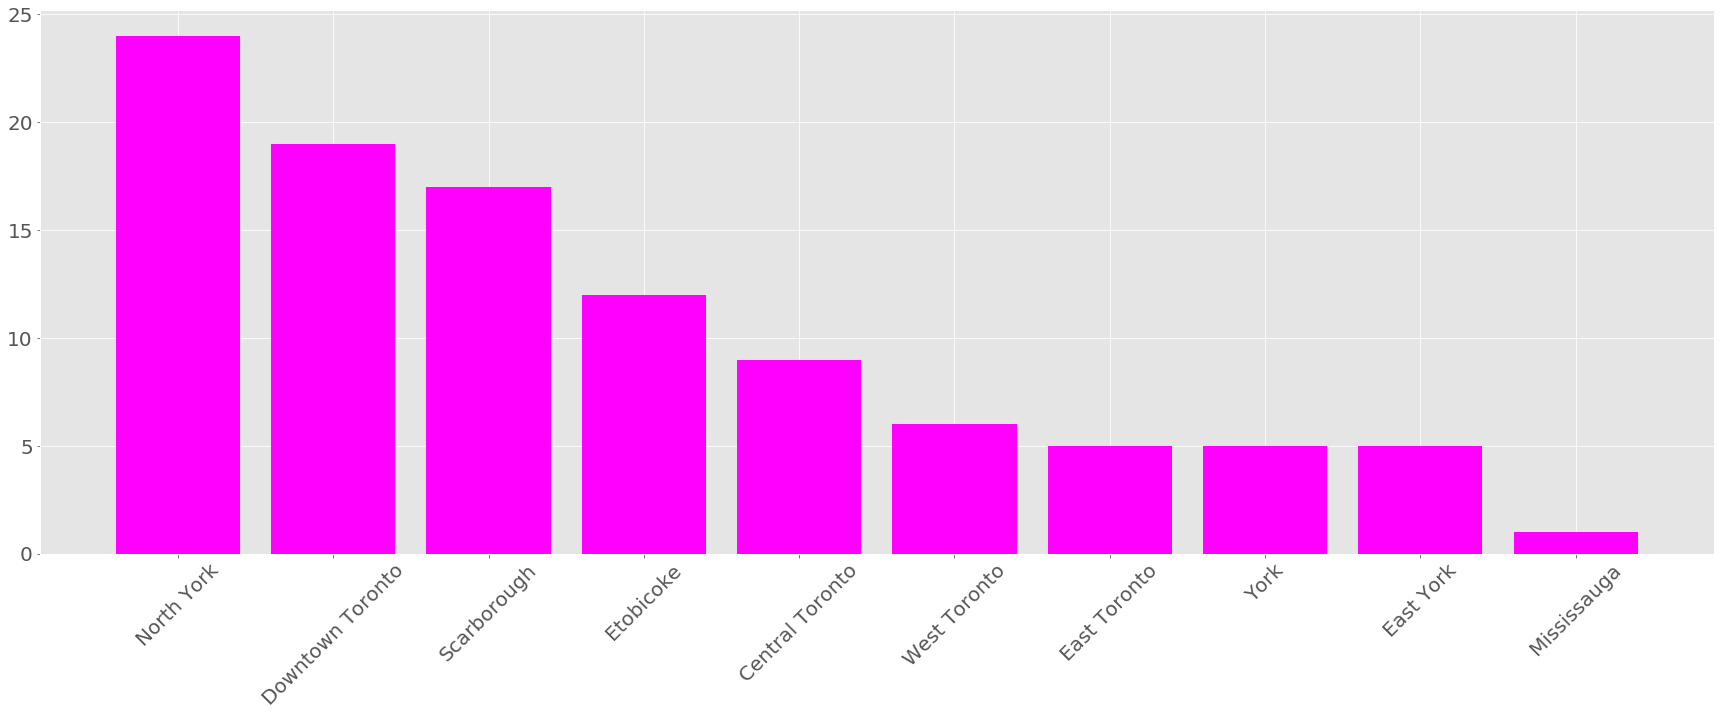

In [40]:
x=df_toronto['Borough'].value_counts()
x.to_frame()
df = x.reset_index(name='count')

import sys

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import datetime
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
plt.figure(figsize = (30, 10))
plt.xticks(rotation=45)
plt.bar(df['index'],df['count'],color='magenta')
plt.grid(b='on')

#plt.savefig('test.png')

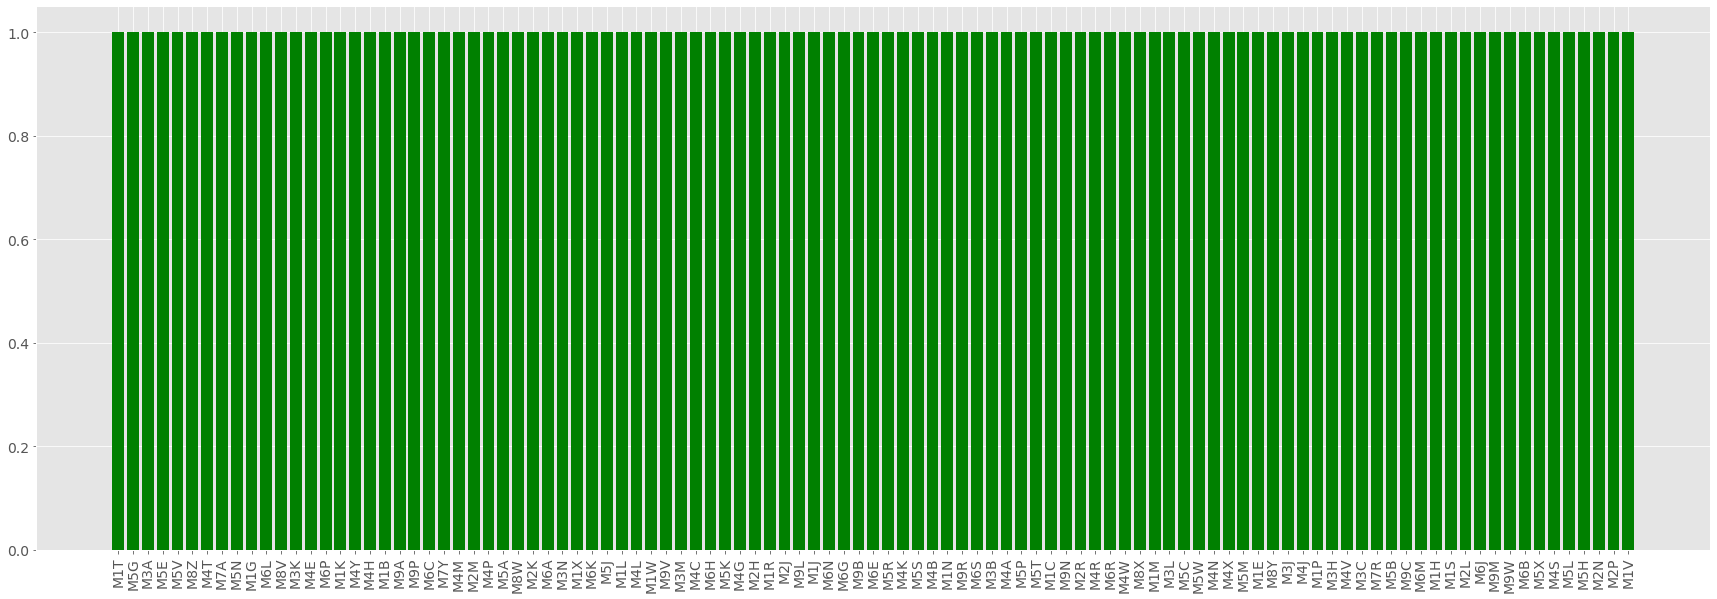

In [41]:
x=df_toronto['PostalCode'].value_counts()
x.to_frame()
df = x.reset_index(name='count')

import sys

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import datetime
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
plt.figure(figsize = (30, 10))
plt.xticks(rotation=90)
plt.bar(df['index'],df['count'],color='green')
plt.grid(b='on')

#plt.savefig('test.png')

In [42]:
explo_df=df_toronto_denc.groupby('Borough').count()
# dataframe created for exploratory data analytics

In [43]:
explo_df_2=explo_df.reset_index()
#explo_df_2 = explo_df_2.rename(columns={'Neighborhood Latitude': 'NL'})
explo_df_2.head()

Borough  PostalCode  Neighborhood  Latitude  Longitude
0   Central Toronto           9             9         9          9
1  Downtown Toronto          19            19        19         19
2      East Toronto           5             5         5          5
3      West Toronto           6             6         6          6

The following box graph explores the number of neighborhoods present at a given Borough.

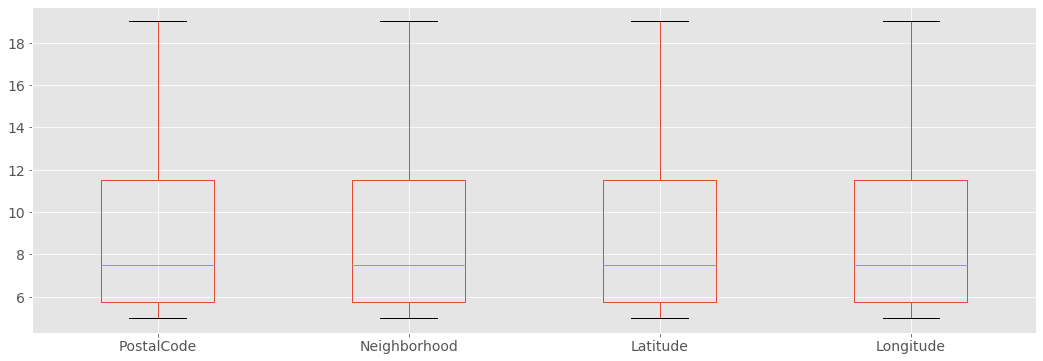

In [44]:
explo_df_2.plot(kind='box',figsize=(18, 6))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


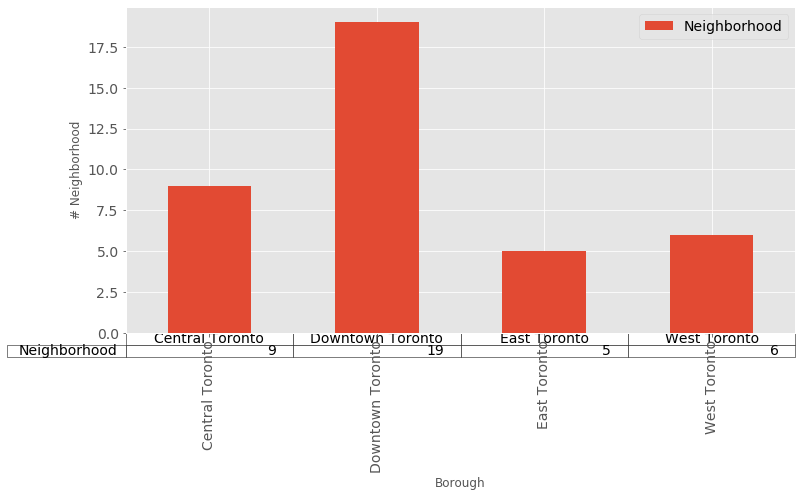

In [45]:
ax=explo_df_2.plot.bar(x='Borough',y='Neighborhood',table=True,figsize=(12, 6))
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("# Neighborhood", fontsize=12)
plt.show()

__Let's find out how many unique categories can be curated from all the returned venues__

In [46]:
print('There are {} uniques categories.'.format(len(toronto_denc_venues['Venue Category'].unique())))

There are 236 uniques categories.


### Analyze Each Neighborhood

In [47]:
# one hot encoding
toronto_denc_onehot = pd.get_dummies(toronto_denc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_denc_onehot['Neighborhood'] = toronto_denc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_denc_onehot.columns[-1]] + list(toronto_denc_onehot.columns[:-1])
toronto_denc_onehot = toronto_denc_onehot[fixed_columns]

toronto_denc_onehot.head()

Yoga Studio  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  ...  Thrift / Vintage Store  Toy / Game Store  Trail  \
0             0  ...                       0                 0      1   
1             0  ...                       0                 0      0   
2             0  ...                       0                 0      0   
3             0  ...                       0                 0      0   
4             0  ...                       0                 0      0   

   Train Station  Vegetarian / Vegan Restaurant  Video Game Store  \
0              0                              0                 0   
1              0                              0                 0   
2              0                              0                 0   
3              0                              0                 0   
4              0                              0                 0   

   Vietnamese Restaurant  Wine Bar  Wings Joint  Women's Store  
0                      0         0            0              0  
1                      0         0            0              0  
2                      0         0            0              0  
3                      0         0            0              0  
4                      0         0            0              0  

[5 rows x 236 columns]

In [61]:
toronto_denc_onehot.columns

Index(['Yoga Studio', 'Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop',
       ...
       'Thrift / Vintage Store', 'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wings Joint', 'Women's Store'],
      dtype='object', length=236)

__Now, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [48]:
toronto_denc_grouped = toronto_denc_onehot.groupby('Neighborhood').mean().reset_index()
toronto_denc_grouped.head()

Neighborhood  Yoga Studio  \
0                           Adelaide, King, Richmond     0.000000   
1                                        Berczy Park     0.000000   
2       Brockton, Exhibition Place, Parkdale Village     0.041667   
3  Business Reply Mail Processing Centre 969 Eastern     0.062500   
4  CN Tower, Bathurst Quay, Island airport, Harbo...     0.000000   

   Afghan Restaurant   Airport  Airport Food Court  Airport Gate  \
0                0.0  0.000000            0.000000      0.000000   
1                0.0  0.000000            0.000000      0.000000   
2                0.0  0.000000            0.000000      0.000000   
3                0.0  0.000000            0.000000      0.000000   
4                0.0  0.055556            0.055556      0.055556   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0        0.000000         0.000000          0.000000                 0.02   
1        0.000000         0.000000          0.000000                 0.00   
2        0.000000         0.000000          0.000000                 0.00   
3        0.000000         0.000000          0.000000                 0.00   
4        0.111111         0.166667          0.111111                 0.00   

   ...  Thrift / Vintage Store  Toy / Game Store  Trail  Train Station  \
0  ...                     0.0               0.0    0.0            0.0   
1  ...                     0.0               0.0    0.0            0.0   
2  ...                     0.0               0.0    0.0            0.0   
3  ...                     0.0               0.0    0.0            0.0   
4  ...                     0.0               0.0    0.0            0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                       0.020000               0.0                    0.0   
1                       0.017544               0.0                    0.0   
2                       0.000000               0.0                    0.0   
3                       0.000000               0.0                    0.0   
4                       0.000000               0.0                    0.0   

   Wine Bar  Wings Joint  Women's Store  
0      0.01          0.0           0.01  
1      0.00          0.0           0.00  
2      0.00          0.0           0.00  
3      0.00          0.0           0.00  
4      0.00          0.0           0.00  

[5 rows x 236 columns]

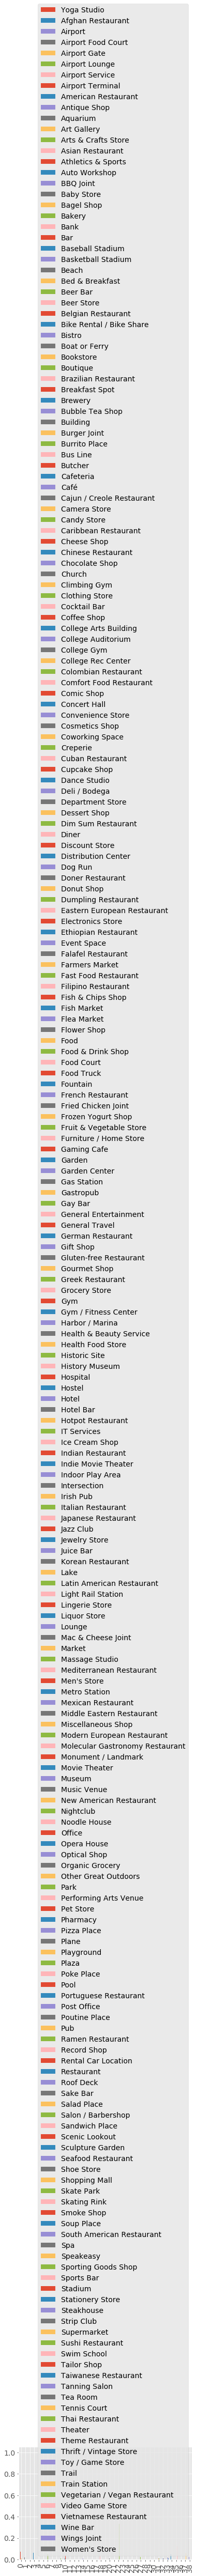

In [50]:
toronto_denc_grouped.plot(kind='bar')

__Check the 10 most common venues in each neighborhood.__

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_denc_grouped['Neighborhood']

for ind in np.arange(toronto_denc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_denc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                        Berczy Park           Coffee Shop   
2       Brockton, Exhibition Place, Parkdale Village                  Café   
3  Business Reply Mail Processing Centre 969 Eastern           Yoga Studio   
4  CN Tower, Bathurst Quay, Island airport, Harbo...       Airport Service   

  2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
0            Restaurant                   Bar                   Café   
1              Beer Bar     French Restaurant             Restaurant   
2           Coffee Shop        Breakfast Spot  Performing Arts Venue   
3         Auto Workshop            Skate Park                Brewery   
4        Airport Lounge      Airport Terminal       Sculpture Garden   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       Thai Restaurant            Steakhouse      Sushi Restaurant   
1                  Café                Bakery    Seafood Restaurant   
2               Stadium         Burrito Place            Restaurant   
3                   Spa        Farmers Market  Fast Food Restaurant   
4              Boutique                   Bar   Rental Car Location   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                   Gym                Lounge         Cosmetics Shop  
1           Cheese Shop          Cocktail Bar         Farmers Market  
2          Climbing Gym             Pet Store            Music Venue  
3         Burrito Place            Restaurant                Butcher  
4                 Plane         Boat or Ferry            Coffee Shop

### Cluster neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [52]:
# set number of clusters to 5
kclusters = 5

toronto_denc_grouped_clustering = toronto_denc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_denc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

__Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood__

In [53]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_denc_merged = df_toronto_denc

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_denc_merged = toronto_denc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_denc_merged.head() # check the last columns!

PostalCode          Borough                    Neighborhood   Latitude  \
0        M4E     East Toronto                     The Beaches  43.676357   
1        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2        M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
3        M4M     East Toronto                 Studio District  43.659526   
4        M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.293031               1           Coffee Shop     Health Food Store   
1 -79.352188               1      Greek Restaurant    Italian Restaurant   
2 -79.315572               1                  Park      Sushi Restaurant   
3 -79.340923               1                  Café           Coffee Shop   
4 -79.388790               2                  Park           Swim School   

  3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
0                   Pub                 Trail                 Dessert Shop   
1           Coffee Shop             Bookstore               Ice Cream Shop   
2        Sandwich Place               Brewery                 Liquor Store   
3             Gastropub   American Restaurant                      Brewery   
4              Bus Line  Ethiopian Restaurant  Eastern European Restaurant   

    6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
0      Dim Sum Restaurant                 Diner             Discount Store   
1  Furniture / Home Store    Frozen Yogurt Shop                        Pub   
2      Italian Restaurant         Burrito Place       Fast Food Restaurant   
3                  Bakery    Italian Restaurant  Latin American Restaurant   
4     Dumpling Restaurant            Donut Shop           Doner Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0   Distribution Center                Dog Run  
1           Pizza Place           Liquor Store  
2        Ice Cream Shop             Steakhouse  
3                  Park     Seafood Restaurant  
4               Dog Run    Distribution Center

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        toronto_denc_merged['Latitude'], 
        toronto_denc_merged['Longitude'], 
        toronto_denc_merged['Neighborhood'], 
        toronto_denc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters
Now, onn can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

__Cluster 0__
In cluster 0 only Central Toronto is coming. In this place first, the most common venue is a Jewelry Store, followed by a Trail, and the last choice is Dumpling Restaurant Donut Shop. For each location, a different cluster shows different values for their choices. The most common places include different types of restaurants. 

In [55]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 0, toronto_denc_merged.columns[[1] \
+ list(range(5, toronto_denc_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
23  Central Toronto               0         Jewelry Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
23                 Trail      Sushi Restaurant              Bus Line   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
23         Women's Store          Dessert Shop     Electronics Store   

          8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
23  Eastern European Restaurant   Dumpling Restaurant             Donut Shop

__Cluster 1__

In [56]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 1, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0       East Toronto               1           Coffee Shop   
1       East Toronto               1      Greek Restaurant   
2       East Toronto               1                  Park   
3       East Toronto               1                  Café   
5    Central Toronto               1               Dog Run   
6    Central Toronto               1        Clothing Store   
7    Central Toronto               1           Pizza Place   
9    Central Toronto               1                   Pub   
11  Downtown Toronto               1            Restaurant   
12  Downtown Toronto               1           Coffee Shop   
13  Downtown Toronto               1           Coffee Shop   
14  Downtown Toronto               1           Coffee Shop   
15  Downtown Toronto               1           Coffee Shop   
16  Downtown Toronto               1           Coffee Shop   
17  Downtown Toronto               1           Coffee Shop   
18  Downtown Toronto               1           Coffee Shop   
19  Downtown Toronto               1           Coffee Shop   
20  Downtown Toronto               1           Coffee Shop   
21  Downtown Toronto               1           Coffee Shop   
24   Central Toronto               1        Sandwich Place   
25  Downtown Toronto               1                  Café   
26  Downtown Toronto               1                   Bar   
27  Downtown Toronto               1       Airport Service   
28  Downtown Toronto               1           Coffee Shop   
29  Downtown Toronto               1           Coffee Shop   
30  Downtown Toronto               1         Grocery Store   
31      West Toronto               1              Pharmacy   
32      West Toronto               1                   Bar   
33      West Toronto               1                  Café   
34      West Toronto               1       Thai Restaurant   
35      West Toronto               1             Gift Shop   
36      West Toronto               1                  Café   
37  Downtown Toronto               1           Coffee Shop   
38      East Toronto               1           Yoga Studio   

   2nd Most Common Venue      3rd Most Common Venue  \
0      Health Food Store                        Pub   
1     Italian Restaurant                Coffee Shop   
2       Sushi Restaurant             Sandwich Place   
3            Coffee Shop                  Gastropub   
5                   Park                        Gym   
6            Coffee Shop                Yoga Studio   
7           Dessert Shop             Sandwich Place   
9            Coffee Shop                 Bagel Shop   
11           Coffee Shop         Italian Restaurant   
12   Japanese Restaurant                    Gay Bar   
13                   Pub                       Park   
14        Clothing Store                       Café   
15                  Café                 Restaurant   
16              Beer Bar          French Restaurant   
17    Italian Restaurant             Sandwich Place   
18            Restaurant                        Bar   
19              Aquarium                       Café   
20                  Café                 Restaurant   
21                  Café                 Restaurant   
24                  Café                Coffee Shop   
25   Japanese Restaurant                        Bar   
26                  Café      Vietnamese Restaurant   
27        Airport Lounge           Airport Terminal   
28            Restaurant                       Café   
29                  Café                 Restaurant   
30                  Café                       Park   
31                Bakery  Middle Eastern Restaurant   
32           Coffee Shop           Asian Restaurant   
33           Coffee Shop             Breakfast Spot   
34                   Bar         Mexican Restaurant   
35        Breakfast Spot           Cuban Restaurant   
36           Coffee Shop         Italian Restaurant   
37          Burger Joint   

__Cluster 2__

In [57]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 2, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
4    Central Toronto               2                  Park   
10  Downtown Toronto               2                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4            Swim School              Bus Line  Ethiopian Restaurant   
10            Playground                 Trail         Deli / Bodega   

          5th Most Common Venue        6th Most Common Venue  \
4   Eastern European Restaurant          Dumpling Restaurant   
10            Electronics Store  Eastern European Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4             Donut Shop      Doner Restaurant               Dog Run   
10   Dumpling Restaurant            Donut Shop      Doner Restaurant   

   10th Most Common Venue  
4     Distribution Center  
10                Dog Run

__Cluster 3__

In [58]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 3, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
22  Central Toronto               3                Garden   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22         Women's Store         Deli / Bodega     Electronics Store   

          5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
22  Eastern European Restaurant   Dumpling Restaurant            Donut Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
22      Doner Restaurant               Dog Run    Distribution Center

__Cluster 4__

In [59]:
toronto_denc_merged.loc[toronto_denc_merged['Cluster Labels'] == 4, toronto_denc_merged.columns[[1] + list(range(5, toronto_denc_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
8  Central Toronto               4          Tennis Court   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
8            Playground                 Trail         Women's Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
8        Discount Store      Department Store          Dessert Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
8    Dim Sum Restaurant                 Diner                Dog Run

## Results and Discussion <a name="results"></a>
The battel of a neighborhood project explored different categories of venues. In this analysis, initially, a sum of 103 unique postal codes has been observed for 10 diffrent Borough. Using geocoder of Geopy library for Toronto, North York, Parkwoods we get the raw result that are comrehensive and self explanatory in nature. 

Based on the above result we split the data into longitude and latitude of the neighborhood. analysis of each neighborhood is carried out with the help of one-hot encoding.  The result of one-hot encoding identified 236 types of places. Followed by one-hot encoding we explore the top 10 common venues in each of the neighborhoods. 

After one hot encoding and venue exploration, we applied the k-means algorithm for k=5.  It has identified 5 cluster centroids c0, c1, c2, c3, and c4.  These five clusters identified in five different colors. Cluster 0 is having only one neighborhood, cluster 1 is having the maximum number of neighborhoods. 

## Conclusion <a name="conclusion"></a>
The purpose of this project was to identify Toronto areas close to the center with a low number of restaurants to aid stakeholders in narrowing down the search for the optimal location for a new restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Down Town and East Toronto), and then generated an extensive collection of locations that satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed to create major zones of interest (containing the greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decisions on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise/proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood.

## References <a name="references"></a>
- Aghabozorgi, Saeed. 2018. Machine Learning with Python. Mountain View CA: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/machine-learning-with-python/home/welcome.
- Ahuja, Rav. 2018. Databases and SQL for Data Science. Mountain View, CA 94041: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/sql-data-science/home/welcome.
- Aklson, Alex. 2019. How to Properly Setup Your Github Repository — Windows Version. Medium, Jan 31. Accessed Feb 26, 2020. https://medium.com/@aklson_DS/how-to-properly-setup-your-github-repository-windows-version-ea596b398b.
- Aklson, Alex. 2018. Introduction to Data Visualization Tools. Mountain View CA: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/python-for-data-visualization/home/welcome.
- Aklson, Alex, and Polong Lin. 2018. Data Science Methodology. Mountain View, CA: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/data-science-methodology/home/welcome.
- Aklson, Alex, and Polong Lin. 2018. What is Data Science. IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/what-is-datascience/home/welcome.
- Lin, Polong. 2018. Open Source tools for Data Science. IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/open-source-tools-for-data-science/home/welcome.
- Nagwanshi, Kapil Kumar. 2019. Learning Classifier System inModern Optimization Methods for Science, Engineering and Technology : IOP Press. https://doi.org/10.1088/978-0-7503-2404-5ch8.
- Santarcangelo, Joseph. 2018. Data Analysis with Python. Mountain View: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/data-analysis-with-python/home/welcome.
- Santarcangelo, Joseph. 2018. Python for data science. Mountain View, CA 94041: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/learn/python-for-applied-data-science-ai/supplement/wq8TO/about-this-course.
- Santarcangelo, Joseph, Rav Ahuja, Polong Lin, Alex Aklson, and Saeed Aghabozorgi. 2018. IBM Data Science Professional Certificate. Mountain View, California: IBM and Coursera. Accessed Feb 2020. https://www.coursera.org/professional-certificates/ibm-data-science.

